# Imports

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [1]:
import sys
sys.path.append('../../fastai/old/') #fastai version 0.7
#sys.path.append('../../fastai/') #fastai version 1

from fastai.conv_learner import *
from fastai.dataset import *
from fastai.models.resnet import vgg_resnet50

from pathlib import Path
import os
import json
import cv2
import numpy as np
from tqdm import tqdm_notebook as tqdm

import utils
from unetEnums import *

ModuleNotFoundError: No module named 'spacy'

In [15]:
torch.cuda.set_device(0)

In [16]:
torch.backends.cudnn.benchmark=True

# Global Variables

In [17]:
# Set some parameters
_imgWidth = 512
_imgHeight = 512
_imgChannels = 3
_trainPath = '../../datasets/2018_dsb/stage1_train_fixed/'
_testPath = '../../datasets/2018_dsb/stage2_test_final/'
_extraDataPath = '../../datasets/2018_dsb/extra_data/'

# Root directory of the project
_rootDir = os.getcwd()

# Directory to save logs and trained model
_modelDir = os.path.join(_rootDir, "logs")

_batchSize = 4
_validationSplit = 0.1
_epochs = 100

_contourThickness = 3

_binaryNumpyFilesPath = '../shared/BinaryNumpyFiles/'

PATH = Path('data')

TRAIN_DN = 'stage1_train_fixed/imgs'
MASKS_DN = 'stage1_train_fixed/masks'

# Data

## Get data into right shape for fastai

In [18]:
train_ids, X_train, Y_train, spaceBetweenTrain, concatenatedMasksTrain = utils.load_dataset(_trainPath, _binaryNumpyFilesPath, _imgWidth, _imgHeight, _imgChannels, datasetType = DataType.trainData, contourThickness = _contourThickness)
#extra_data_ids, X_extra_data, Y_extra_data, spaceBetween_extra_data, concatenatedMasks_extra_data = utils.load_dataset(_extraDataPath, _binaryNumpyFilesPath, _imgWidth, _imgHeight, _imgChannels, datasetType=DataType.extraData, contourThickness = _contourThickness)
test_ids, X_test, sizes_test = utils.load_dataset(_testPath, _binaryNumpyFilesPath, _imgWidth, _imgHeight, _imgChannels, datasetType=DataType.testData, contourThickness = _contourThickness)

trying to load the numpy arrays from binary files
Done!
trying to load the numpy arrays from binary files
Done!


In [19]:
#img and mask as numpy array
def saveNpAsImg(imgs_path, masks_path, img_id, img, mask):
    cv2.imwrite(os.path.join(imgs_path, img_id)+'.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    cv2.imwrite(os.path.join(masks_path, img_id)+'_mask.png', mask.astype('uint8')*255)    

In [20]:
imgs_path = os.path.join(PATH, TRAIN_DN)
masks_path = os.path.join(PATH, MASKS_DN)
#for img_id, img, mask in zip(train_ids, X_train, Y_train):
    #saveNpAsImg(imgs_path, masks_path, img_id, img, mask)
    
for img_id, img, mask in tqdm(zip(train_ids, X_train, Y_train), total=len(train_ids)):
    saveNpAsImg(imgs_path, masks_path, img_id, img, mask)

## Dataset

In [23]:
sz=512
bs=8

In [24]:
x_names = np.array([Path(PATH/TRAIN_DN)/f'{o}.jpg' for o in train_ids])
y_names = np.array([Path(PATH/MASKS_DN)/f'{o}_mask.png' for o in train_ids])

In [25]:
def show_img(im, figsize=None, ax=None, alpha=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, alpha=alpha)
    ax.set_axis_off()
    return ax

In [26]:
img = Image.open(x_names[0])
img.mode

'RGB'

In [27]:
img = Image.open(y_names[0])
img.mode

'L'

In [28]:
ims = [Image.open(path) for path in x_names[0:16]]
masks = [Image.open(path) for path in y_names[0:16]]

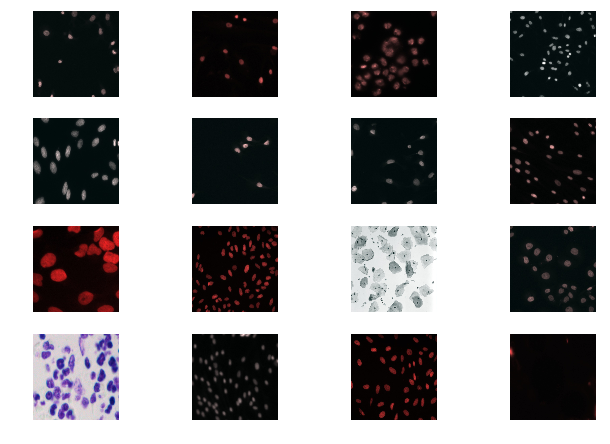

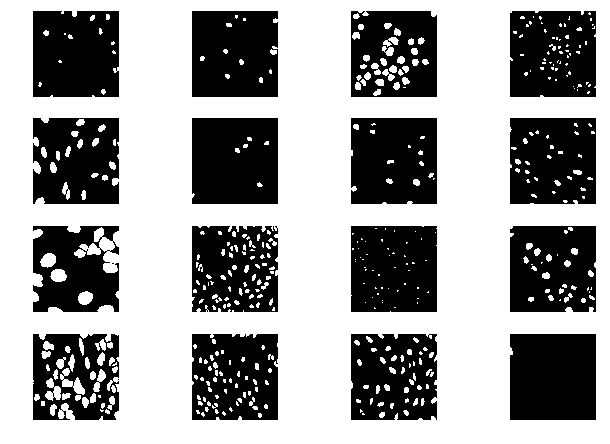

In [36]:
fig, axes = plt.subplots(4, 4, figsize=(9, 6))
for i,ax in enumerate(axes.flat): show_img(ims[i], ax=ax)
plt.tight_layout(pad=0.1)

fig, axes = plt.subplots(4, 4, figsize=(9, 6))
for i,ax in enumerate(axes.flat): show_img(masks[i], ax=ax)
plt.tight_layout(pad=0.1)